In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_image_files_path = "/content/drive/MyDrive/Khuon mat/trainnew"
valid_image_files_path = "/content/drive/MyDrive/Khuon mat/VALIDATION"
label=['ANH','GIAHUY','LIENHUULOC','LONGBUI','TANLOC','THANG','VU']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(200, 200),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),               
    class_mode='categorical')

Found 704 images belonging to 7 classes.
Found 497 images belonging to 7 classes.


In [ ]:
model=tf.keras.models.Sequential()

model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  
model.add(Flatten()) 

model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(7, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])
history=model.fit(
    train_generator,
    steps_per_epoch=1,
    epochs=150,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=1)

Epoch 1/150
1/1 [==============================] - 36s 36s/step - loss: 1.9201 - acc: 0.1250 - val_loss: 4.4177 - val_acc: 0.4688
Epoch 2/150
1/1 [==============================] - 31s 31s/step - loss: 3.5883 - acc: 0.4375 - val_loss: 4.9089 - val_acc: 0.1562
Epoch 3/150
1/1 [==============================] - 28s 28s/step - loss: 4.2771 - acc: 0.2812 - val_loss: 2.2227 - val_acc: 0.3438
Epoch 4/150
1/1 [==============================] - 27s 27s/step - loss: 2.2587 - acc: 0.3750 - val_loss: 1.7148 - val_acc: 0.4375
Epoch 5/150
1/1 [==============================] - 23s 23s/step - loss: 1.4953 - acc: 0.5625 - val_loss: 1.3226 - val_acc: 0.6250
Epoch 6/150
1/1 [==============================] - 17s 17s/step - loss: 1.3005 - acc: 0.7812 - val_loss: 1.1933 - val_acc: 0.4062
Epoch 7/150
1/1 [==============================] - 20s 20s/step - loss: 1.2319 - acc: 0.5938 - val_loss: 0.9232 - val_acc: 1.0000
Epoch 8/150
1/1 [==============================] - 13s 13s/step - loss: 0.7702 - acc: 1.00

Saving WIN_20220524_23_32_06_Pro.jpg to WIN_20220524_23_32_06_Pro (1).jpg
[[1. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  ANH


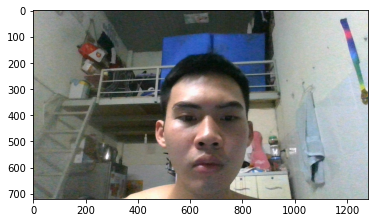

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving HUY 86.jpg to HUY 86.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  GIAHUY


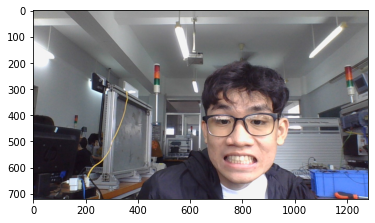

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])